# EMPLOYEES ATTRITION PREDICTION- PROJECT

# Need of Employee Attrition prediction

1.**Managing workforce**: If the supervisors or HR came to know about some employees that they will be planning to leave the company then they could get in touch with those employees which can help them to stay back or they can manage the workforce by hiring the new alternative of those employees.

2.**Smooth pipeline**: If all the employees in the current project are working continuously on a project then the pipeline of that project will be smooth but if suppose one efficient asset of the project(employee) suddenly leave that company then the workflow will be not so smooth

3.**Hiring Management**: If HR of one particular project came to know about the employee who is willing to leave the company then he/she can manage the number of hiring and they can get the valuable asset whenever they need so for the efficient flow of work.

# Table of content
1. Importing libraries
2. Data exploration
3. Data cleaning
4. Splitting data (train test split)
5. Model development applying 6-ML algorithms
  1. Logistic Regression
  2. Decision tree
  3. KNN
  4. SVM
  5. Random Forest
  6. Naive Bayes
6. Saving model

# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Reading the dataset

In [2]:
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

# Let’s look at our dataset !

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# Shape of the dataset

In [4]:
#Get the number of rows and number of columns in the data
df.shape

(1470, 35)

# Data Exploration

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
df1 = df.drop(["EmployeeNumber","StandardHours","EmployeeCount","Over18","OverTime"],axis=1)
df1.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [7]:
# seperating the numberical and categorical variables.

num_data = df1.select_dtypes(include=[np.number])
cat_data = df1.select_dtypes(exclude=[np.number])

In [8]:
num_data

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,...,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,...,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,...,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,...,3,3,1,17,3,3,5,2,0,3
1466,39,613,6,1,4,42,2,3,1,9991,...,3,1,1,9,5,3,7,7,1,7
1467,27,155,4,3,2,87,4,2,2,6142,...,4,2,1,6,0,3,6,2,0,3
1468,49,1023,2,3,4,63,2,2,2,5390,...,3,4,0,17,3,2,9,6,0,8


In [9]:
cat_data

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married
...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married


In [10]:
df1.shape

(1470, 30)

In [11]:
df1.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

### Looks like their is no missing data since all of the columns are returning a value of 0. Let’s double check the data set for any missing values.

In [12]:
# Another check for any null / missing values
df1.isnull().values.any()

False

### The code above returned a value = False, indicates their are no missing values.

In [13]:
# View some basic statistical details like percentile, mean, standard deviation etc.
df1.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [14]:
for column in df1.columns:
    if df1[column].dtype == object:
        print(str(column) + ' : ' + str(df1[column].unique()))
        print(df1[column].value_counts())
        print("_________________________________________________________________")

Attrition : ['Yes' 'No']
No     1233
Yes     237
Name: Attrition, dtype: int64
_________________________________________________________________
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
_________________________________________________________________
Department : ['Sales' 'Research & Development' 'Human Resources']
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
_________________________________________________________________
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
_________________________________________________________________
Gender 

In [15]:
# Get a count of the number of employee attrition, the number of employees that stayed (no) and the number that left (yes)

df1["Attrition"].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

# Data Visualization

<function matplotlib.pyplot.show(close=None, block=None)>

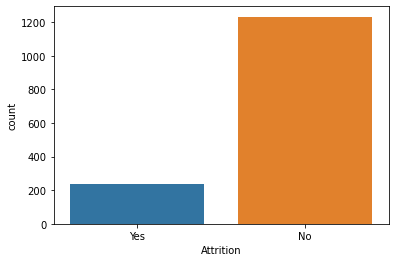

In [16]:
sns.countplot(x='Attrition',data = df1)
plt.show

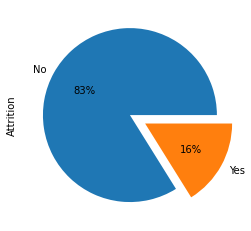

In [17]:
df1['Attrition'].value_counts().plot(kind='pie', explode=[0,0.2],autopct='%i%%')
plt.show()

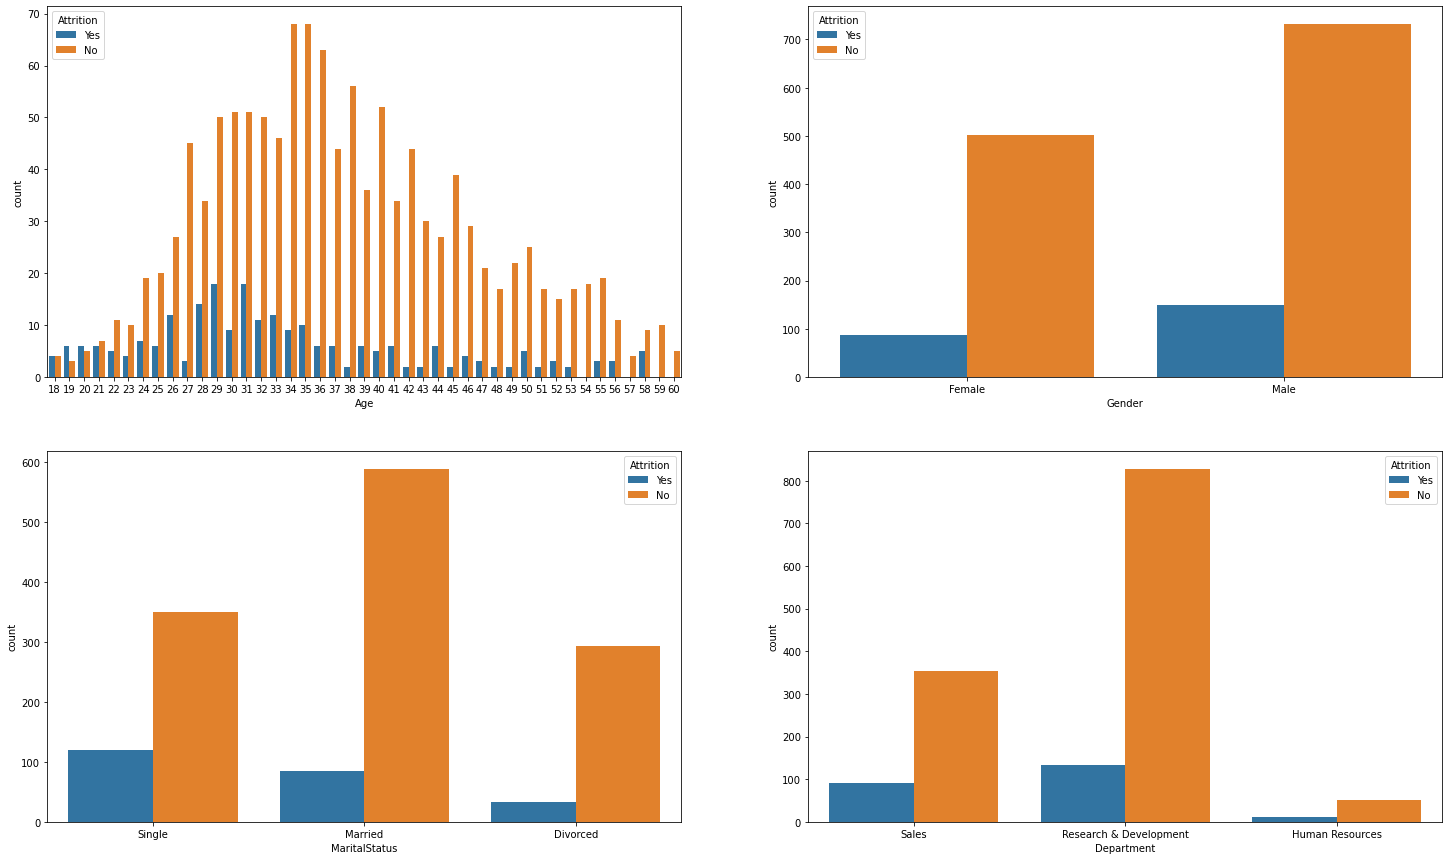

In [18]:
fig, axarr = plt.subplots(2, 2, figsize=(25, 15))
sns.countplot(x='Age', hue = 'Attrition',data = df1, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Attrition',data = df1, ax=axarr[0][1])
sns.countplot(x='MaritalStatus', hue = 'Attrition',data = df1, ax=axarr[1][0])
sns.countplot(x='Department', hue = 'Attrition',data = df1, ax=axarr[1][1])
plt.show()

<AxesSubplot:xlabel='EducationField', ylabel='count'>

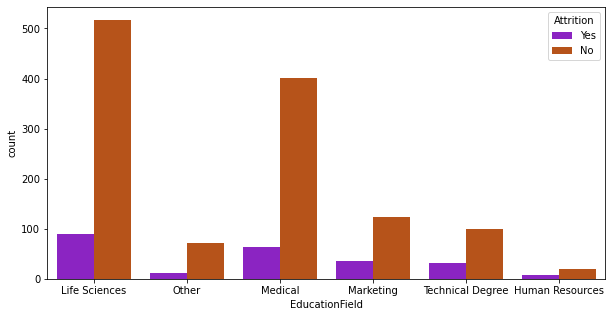

In [19]:
plt.subplots(figsize=(10,5))
sns.countplot(x= 'EducationField',hue = 'Attrition',data = df1,palette='gnuplot')

# Imbalance Data

In [20]:
# We can see that it is imblanced data.

from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [21]:
for col in cat_data.columns:
    df1[col] = LE.fit_transform(df1[col])
df1

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,3,1,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,4,1,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,2,1,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,4,1,...,3,4,0,17,3,2,9,6,0,8


In [22]:
Attrition_No,Attrition_yes = df1["Attrition"].value_counts()

# Seperate Attrition
not_A = df1[df1["Attrition"] == 0]
yes_A = df1[df1["Attrition"] == 1]

print("Attrition_No:",not_A.shape)
print("Attrition_Yes:",yes_A.shape)

Attrition_No: (1233, 30)
Attrition_Yes: (237, 30)


In [23]:
Attrition_over = yes_A.sample(Attrition_No,replace=True)
test_over = pd.concat([Attrition_over,not_A],axis=0)
test_over

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1213,23,1,2,427,2,7,3,1,3,1,...,4,2,1,3,2,3,3,2,0,2
382,26,1,1,575,1,3,1,5,3,1,...,4,3,0,7,2,3,6,4,0,4
688,19,1,2,419,2,21,3,4,4,1,...,3,2,0,1,3,4,1,0,0,0
21,36,1,2,1218,2,9,4,1,3,1,...,4,2,0,10,4,3,5,3,0,3
813,39,1,1,203,1,2,3,1,1,1,...,3,4,3,21,4,3,18,7,11,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,3,1,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,4,1,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,2,1,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,4,1,...,3,4,0,17,3,2,9,6,0,8


In [24]:
test_over["Attrition"].value_counts()


0    1233
1    1233
Name: Attrition, dtype: int64

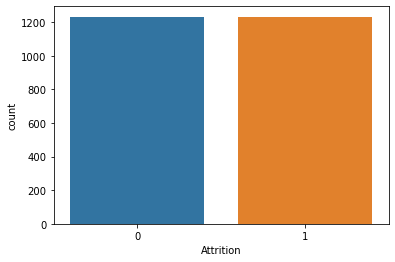

In [25]:
sns.countplot(data=test_over,x="Attrition")
plt.show()

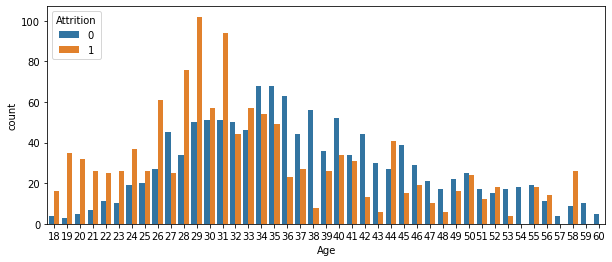

In [26]:
plt.figure(figsize=(10,4))
sns.countplot(data=test_over,x="Age",hue="Attrition")
plt.show()

### What’s interesting here is that you can see the age with the highest count of employee attrition is age 34 & 35. The age with the highest retention is age 29 & 31.

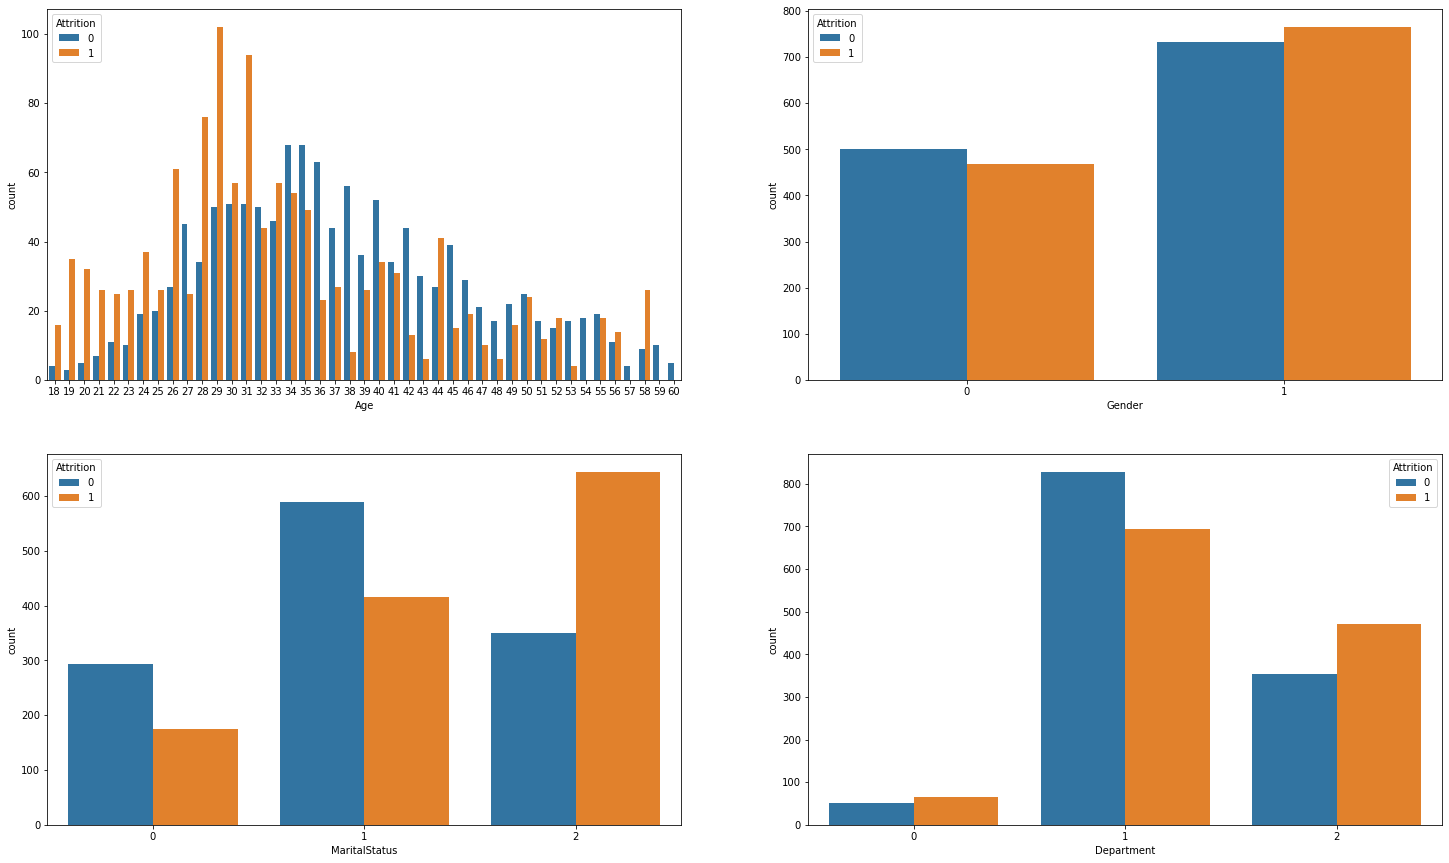

In [27]:
fig, axarr = plt.subplots(2, 2, figsize=(25, 15))
sns.countplot(x='Age', hue = 'Attrition',data = test_over, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Attrition',data = test_over, ax=axarr[0][1])
sns.countplot(x='MaritalStatus', hue = 'Attrition',data = test_over, ax=axarr[1][0])
sns.countplot(x='Department', hue = 'Attrition',data = test_over, ax=axarr[1][1])
plt.show()

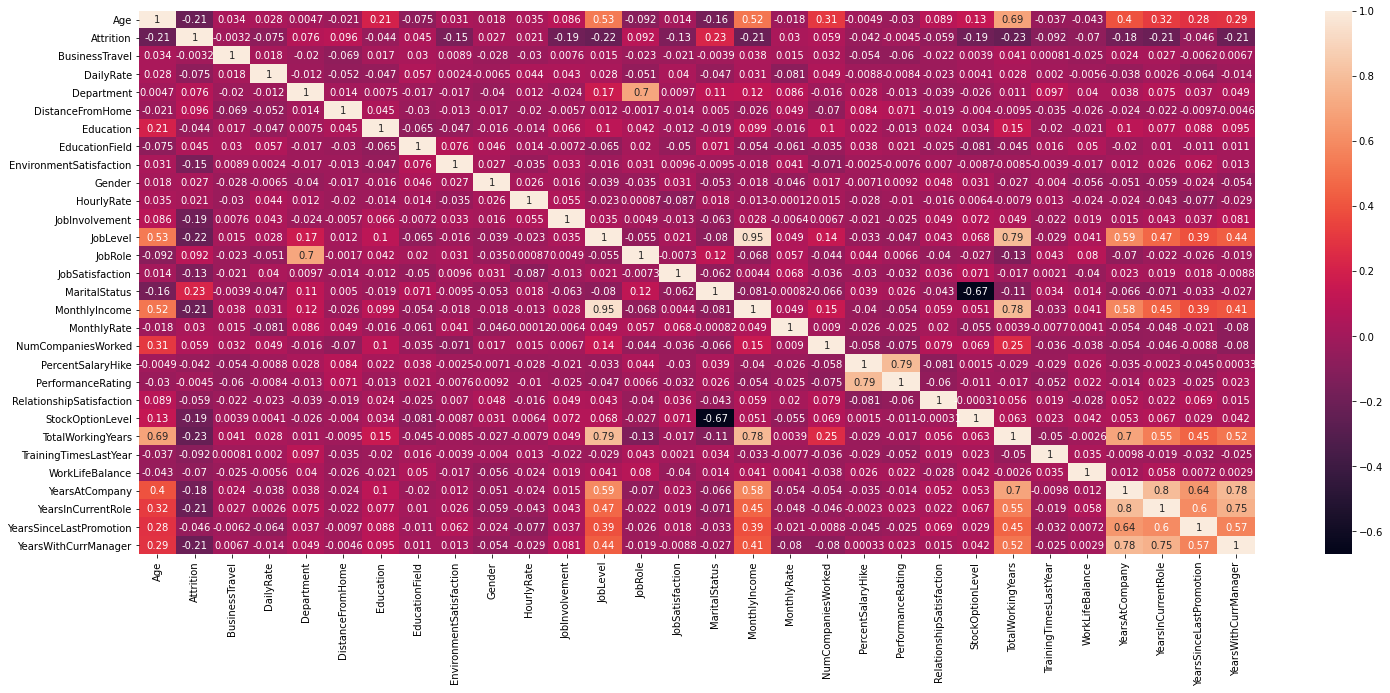

In [28]:
plt.figure(figsize=(25,10))
sns.heatmap(test_over.corr(),annot=True)
plt.show()

# Feature Scaling

In [29]:
X = test_over.drop(["Attrition"],axis=1)
Y = test_over["Attrition"]

In [30]:
X

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1213,23,2,427,2,7,3,1,3,1,99,...,4,2,1,3,2,3,3,2,0,2
382,26,1,575,1,3,1,5,3,1,73,...,4,3,0,7,2,3,6,4,0,4
688,19,2,419,2,21,3,4,4,1,37,...,3,2,0,1,3,4,1,0,0,0
21,36,2,1218,2,9,4,1,3,1,82,...,4,2,0,10,4,3,5,3,0,3
813,39,1,203,1,2,3,1,1,1,84,...,3,4,3,21,4,3,18,7,11,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1,884,1,23,2,3,3,1,41,...,3,3,1,17,3,3,5,2,0,3
1466,39,2,613,1,6,1,3,4,1,42,...,3,1,1,9,5,3,7,7,1,7
1467,27,2,155,1,4,3,1,2,1,87,...,4,2,1,6,0,3,6,2,0,3
1468,49,1,1023,2,2,3,3,4,1,63,...,3,4,0,17,3,2,9,6,0,8


In [31]:
Y

1213    1
382     1
688     1
21      1
813     1
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 2466, dtype: int32

In [32]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [33]:
X_scaled = ss.fit_transform(X)

In [34]:
X_scaled

array([[-1.32401217,  0.62364658, -0.87464028, ..., -0.49566042,
        -0.65492652, -0.47615247],
       [-1.00751217, -0.95694178, -0.51011436, ...,  0.07391022,
        -0.65492652,  0.10141368],
       [-1.74601217,  0.62364658, -0.89434438, ..., -1.06523106,
        -0.65492652, -1.05371863],
       ...,
       [-0.90201217,  0.62364658, -1.54457981, ..., -0.49566042,
        -0.65492652, -0.18736939],
       [ 1.41898784, -0.95694178,  0.59331546, ...,  0.64348086,
        -0.65492652,  1.256546  ],
       [-0.16351217,  0.62364658, -0.37957467, ..., -0.2108751 ,
        -0.34132481, -0.47615247]])

# Splitting data – Train test split

In [35]:
# Split the dataset into 75% Training set and 25% Testing set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size = 0.25, random_state = 0)


In [36]:
print(X_train.shape)
print(Y_train.shape)

(1849, 29)
(1849,)


In [37]:
print(X_test.shape)
print(Y_test.shape)

(617, 29)
(617,)


# Model Development

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initializing the models
1. Logistic Regression : C: Inverse of regularization strength (float), random state: (int), solver: sag,saga,liblinear (Here, we are using liblinear).
2. Decision trees: Default parameters
3. Random forest: Default parameters
4. Gaussian Naive Bayes: Default parameters
5. K-nearest neighbors: n_neighbors=3 – we can have another number of neighbors too.
6. Support vector machines: kernel can be linear, polynomial, RBF, sigmoid. Here we are using a linear kernel function.

In [75]:
lr=LogisticRegression(C = 0.1, random_state = 42, solver = 'liblinear')
dt=DecisionTreeClassifier()
rm=RandomForestClassifier()
knn = KNeighborsClassifier(n_neighbors=3)


In [77]:
for a,b in zip([lr,dt,knn,rm],["Logistic Regression","Decision Tree","KNN","Random Forest"]):
    a.fit(X_train,Y_train)
    prediction=a.predict(X_train)
    y_pred=a.predict(X_test)
    score1=accuracy_score(Y_train,prediction)
    score=accuracy_score(Y_test,y_pred)
    msg1="[%s] training data accuracy is : %f" % (b,score1)
    msg2="[%s] test data accuracy is : %f" % (b,score)
    print(msg1)
    print(msg2)

[Logistic Regression] training data accuracy is : 0.719308
[Logistic Regression] test data accuracy is : 0.703404
[Decision Tree] training data accuracy is : 1.000000
[Decision Tree] test data accuracy is : 0.902755
[KNN] training data accuracy is : 0.935641
[KNN] test data accuracy is : 0.884927
[Random Forest] training data accuracy is : 1.000000
[Random Forest] test data accuracy is : 0.978930


In [78]:
model_scores={'Logistic Regression':lr.score(X_test,Y_test),
             'KNN classifier':knn.score(X_test,Y_test),
             'Random forest':rm.score(X_test,Y_test),
              'Decision tree':dt.score(X_test,Y_test),
             }
model_scores

{'Logistic Regression': 0.7034035656401945,
 'KNN classifier': 0.8849270664505673,
 'Random forest': 0.9789303079416531,
 'Decision tree': 0.9027552674230146}

### Here, we can see that Decision tree and Random forest have the best accuracy.

# Model Comparison

In [79]:
# Based on the accuracy

model_compare=pd.DataFrame(model_scores,index=['accuracy'])
model_compare

,Logistic Regression,KNN classifier,Random forest,Decision tree
accuracy,0.703404,0.884927,0.97893,0.902755


# Visualize the accuracy of each model

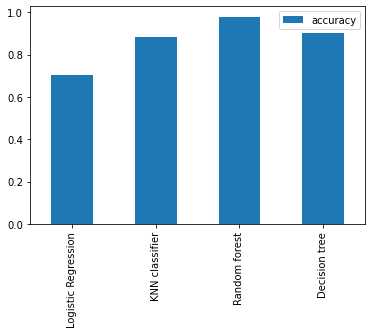

In [80]:
model_compare.T.plot(kind='bar') # (T is here for transpose)
plt.show()

In [44]:
# Ramdom forest is the best algoritham which is highest accuracy.

In [81]:
# Classification Report of Random forest

from sklearn.metrics import classification_report,confusion_matrix

rm_y_preds = rm.predict(X_test)

print(classification_report(Y_test,rm_y_preds))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98       302
           1       0.97      0.99      0.98       315

    accuracy                           0.98       617
   macro avg       0.98      0.98      0.98       617
weighted avg       0.98      0.98      0.98       617



In [82]:
cm = confusion_matrix(Y_test,rm_y_preds)
cm

array([[291,  11],
       [  2, 313]], dtype=int64)

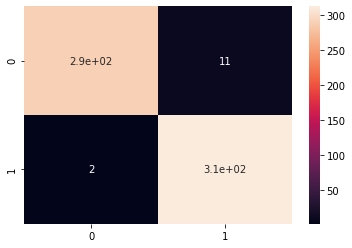

In [83]:
sns.heatmap(cm,annot=True)
plt.show()

In [84]:
# check important features
feature_imp_df = pd.DataFrame({"feature":list(X.columns), 
            "importance":rm.feature_importances_}).sort_values("importance", ascending=False)



In [89]:
feature_imp_df

,feature,importance
15,MonthlyIncome,0.085828
0,Age,0.069307
2,DailyRate,0.056405
9,HourlyRate,0.051138
16,MonthlyRate,0.051107
22,TotalWorkingYears,0.048280
4,DistanceFromHome,0.048007
25,YearsAtCompany,0.044951
21,StockOptionLevel,0.043197
18,PercentSalaryHike,0.038776


In [90]:
# visualize important feature
# creating a bar plot

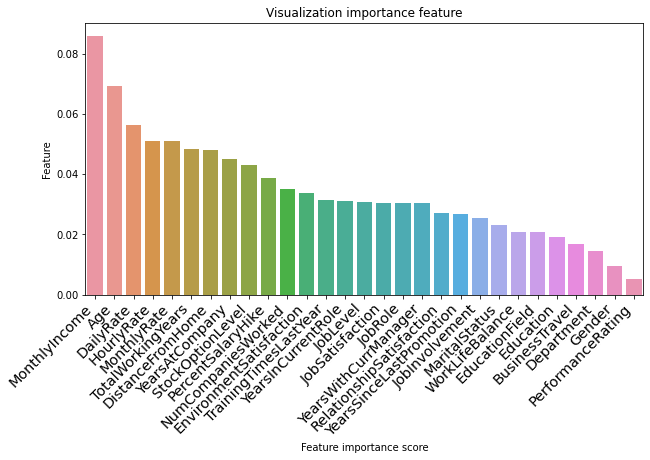

In [91]:
plt.figure(figsize=(10,5))

sns.barplot(x=feature_imp_df.feature, y=feature_imp_df.importance)
plt.xlabel("Feature importance score")
plt.ylabel("Feature")
plt.title("Visualization importance feature")
plt.xticks(rotation=45, horizontalalignment='right', fontsize="x-large", fontweight='light')
plt.show()


### Monthly income appears to be the most important feature followed by the persons age, daily rate, and monthly rate. Seeing this result makes me want to see if people with a higher income are less likely to leave than someone with a lower income.

# The End